<a href="https://colab.research.google.com/drive/1utsd9kOh99bu46AqZxv8ODWynrWQqq5N?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Cleaning and Exploration in FIFA 21**

FIFA 21 is an association football simulation video game published by Electronic Arts (EA), the game features more than 30 official leagues, over 700 clubs, and over 17,000 players.

EA Sports employs a team of 25 EA Producers and 400 outside data contributors, who are led by Head of Data Collection & Licensing Michael Mueller-Moehring. This team is responsible for ensuring all player data is up to date, while a community of over 6,000 FIFA Data Reviewers or Talent Scouts from all over the world are constantly providing suggestions and alterations to the database.

## Import Libraries

Import necessary libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
pd.set_option('display.max_columns', 100)

##Data Wrangling

### Assessing Data

In [139]:
url = 'https://raw.githubusercontent.com/akbaradie/fifa21-cleaning-EDA/main/data/fifa21_raw_data_v2.csv'
fifa_df = pd.read_csv(url)
fifa_df.head()

<ipython-input-139-63dca135b9b1>:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv(url)


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [140]:
fifa_df.shape

(18979, 77)

There are data with 1879 rows dan 77 columns

Next, we are going to check data duplication, missing value, invalid data, and innacurate data.

Checking for data duplication

In [141]:
fifa_df.duplicated().sum()

0

In [142]:
fifa_df['ID'].duplicated().sum()

0

There is no data duplication.

In [143]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

Based on first observation, each player has their own **ID** that includes information about them. Then, the next attributes represent the sum of metrics:
Attacking = Crossing + Finishing + Heading Accuracy + Short Passing + Volleys

**Skill** = Crossing + Finishing + Heading Accuracy + Short Passing + Volleys

**Movement** = Acceleration + Sprint Speed + Agility + Reactions + Balance

**Power** = Shot Power + Jumping + Stamina + Strength + Long Shots

**Mentality** = Aggression + Interceptions + Positioning + Vision + Penalties + Composure

**Defending** = Marking + Standing Tackle + Sliding Tackle

**Goalkeeping** = GK Diving + GK Handling + GK Kicking + GK Positioning + GK Reflexes

We will further observe the columns with the **Object** data type. From the information above, several things can be obtained as follows:
- There are missing values in the **Loan Date End** and **Hits** columns
- There is invalid and inconsistent data in the **Height, Weight, Joined, Loan Date End, Value, Wage, Release Clause** columns

The **OVA** column will be renamed by removing the arrow character

In [144]:
fifa_df.rename(columns={'↓OVA':'OVA'},inplace=True)
print(list(fifa_df.columns))

['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age', 'OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits']


There is Null data in the **Loan Date End** and **Hits** columns. We will see the contents of the data from the **Club, Contract, Positions, Height, Weight, Joined** and **Loan Date End columns**

In [145]:
fifa_df[['Club','Contract','Positions','Height','Weight','Joined','Preferred Foot','Loan Date End','Value','Wage','Release Clause','W/F','SM','A/W','D/W','IR','Hits']].sample(n=10)

,Club,Contract,Positions,Height,Weight,Joined,Preferred Foot,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
2457,\n\n\n\n1. FSV Mainz 05,2015 ~ 2021,"CM, CDM",179cm,76kg,"Jul 1, 2015",Right,NaN,€4M,€24K,€9M,4 ★,3★,High,High,1 ★,6
17458,\n\n\n\nFC Groningen,2018 ~ 2021,CB,180cm,75kg,"May 9, 2018",Right,NaN,€325K,€850,€374K,3 ★,2★,Medium,Medium,1 ★,NaN
5447,\n\n\n\nGrenoble Foot 38,2020 ~ 2023,"CDM, CM",180cm,73kg,"Oct 5, 2020",Right,NaN,€1.2M,€4K,€1.6M,3 ★,3★,Medium,Medium,1 ★,1
15239,\n\n\n\nDoncaster Rovers,2020 ~ 2022,"CB, LB",181cm,78kg,"Aug 28, 2020",Left,NaN,€550K,€1K,€1M,2 ★,2★,Medium,Medium,1 ★,13
9466,\n\n\n\nDeportivo Binacional,2018 ~ 2020,"LB, LM",178cm,79kg,"Jan 6, 2018",Left,NaN,€600K,€500,€860K,2 ★,2★,Medium,Low,1 ★,1
6483,\n\n\n\nHokkaido Consadole Sapporo,2017 ~ 2021,CB,187cm,78kg,"Feb 1, 2017",Right,NaN,€1.3M,€3K,€1.3M,3 ★,2★,Medium,Medium,1 ★,1
4281,\n\n\n\nClub Atlético Banfield,2020 ~ 2021,RM,178cm,83kg,"Sep 3, 2020",Right,NaN,€2M,€10K,€3.8M,3 ★,3★,Medium,Medium,1 ★,7
5309,\n\n\n\nHuddersfield Town,"Jun 30, 2021 On Loan","CDM, CM",179cm,76kg,"Jan 1, 2014",Left,"Jun 30, 2021",€3M,€7K,€0,4 ★,3★,Medium,Medium,1 ★,38
18385,\n\n\n\nPerth Glory,2019 ~ 2020,ST,188cm,80kg,"Oct 13, 2019",Right,NaN,€200K,€500,€188K,3 ★,2★,High,Medium,1 ★,NaN
15258,\n\n\n\nForest Green Rovers,2018 ~ 2021,GK,185cm,70kg,"Jul 1, 2018",Right,NaN,€475K,€2K,€488K,3 ★,1★,Medium,Medium,1 ★,6


It appears that there is invalid data in **Club, Contract, Value, Wage, Release Clause**. Then there is inconsistent data on **Height** and **Height**. Next, data cleaning will be carried out in these columns.

### Cleaning Data

#### Cleaning Weight, Height, and Club column

In [146]:
print("Unique data of Weight:\n",fifa_df['Weight'].unique(),"\n")
print("Unique data of Height:\n",fifa_df['Height'].unique())

Unique data of Weight:
 ['72kg' '83kg' '87kg' '70kg' '68kg' '80kg' '71kg' '91kg' '73kg' '85kg'
 '92kg' '69kg' '84kg' '96kg' '81kg' '82kg' '75kg' '86kg' '89kg' '74kg'
 '76kg' '64kg' '78kg' '90kg' '66kg' '60kg' '94kg' '79kg' '67kg' '65kg'
 '59kg' '61kg' '93kg' '88kg' '97kg' '77kg' '62kg' '63kg' '95kg' '100kg'
 '58kg' '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs'
 '203lbs' '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs'
 '165lbs' '159lbs' '192lbs' '181lbs' '139lbs' '154lbs' '157lbs' '163lbs'
 '98kg' '103kg' '99kg' '102kg' '56kg' '101kg' '57kg' '55kg' '104kg'
 '107kg' '110kg' '53kg' '50kg' '54kg' '52kg'] 

Unique data of Height:
 ['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '

Cleaning will be carried out in the following columns:
- Clubs: Removes the **\n** character.
- Height: Remove the **cm** character, change the units in feet and inches to cm. Next, the data is converted to integer or float.
- Height. Removed the **kg** character, changed the unit lbs to kg. Next, the data is converted to integer or float.

In [147]:
fifa2_df = fifa_df.copy()
#remove \n character
fifa2_df['Club'] = fifa2_df['Club'].str.strip('\n')
#remove cm character
fifa2_df['Height'] = fifa2_df['Height'].str.strip('cm')
#remove kg character
fifa2_df['Weight'] = fifa2_df['Weight'].str.strip('kg')

In [148]:
#Convert feet to cm
def feet_to_cm(x):
  if "'" in x:
    idx=x.index("'")
    y=float(x[:idx])*30.48+float(x[idx+1:-1])*2.54
    return int(y)
  else:
    return int(x)


fifa2_df['Height'] = fifa2_df['Height'].apply(feet_to_cm)

In [149]:
#Convert lbs to kg
def lbs_to_kg(x):
  if "lbs" in x:
    lbs = x.replace("lbs","")
    return int(float(lbs)*0.45359)
  else:
    return int(x)

fifa2_df['Weight'] = fifa2_df['Weight'].apply(lbs_to_kg)

####Cleaning Value, Wage, and Release Clause column

**Value, Wage** and **Release Clause** column will be cleaned by deleting currency symbols, M characters and K characters. Then data containing the letter M is multiplied by one million, while data containing K is multiplied by one thousand.

In [150]:
#Remove currency symbols. Change M and K
def money_convert(x):
  if "€" in x:
    x=x.replace("€","")

  if "M" in x:
    x=x.replace("M","")
    x=float(x)*1000000

  elif "K" in x:
    x=x.replace("K","")
    x=float(x)*1000

  return float(x)

In [151]:
fifa2_df["Value"]=fifa2_df["Value"].apply(money_convert)
fifa2_df["Wage"]= fifa2_df["Wage"].apply(money_convert)
fifa2_df["Release Clause"] = fifa_df["Release Clause"].apply(money_convert)
fifa2_df[['Value','Wage','Release Clause']].sample(n=10)

,Value,Wage,Release Clause
2347,9000000.0,38000.0,20000000.0
15549,575000.0,650.0,691000.0
15447,625000.0,500.0,882000.0
14336,275000.0,500.0,495000.0
16980,325000.0,600.0,174000.0
9759,650000.0,2000.0,831000.0
981,10500000.0,34000.0,15300000.0
4146,2200000.0,16000.0,5100000.0
6519,2400000.0,12000.0,2400000.0
7735,1300000.0,500.0,2000000.0


####Cleaning W/F, AW, SM, IR, and Hits column

Data cleaning will be carried out in the **W/F, SM, A/W, D/W,** and **IR** columns. First, check the unique data in each column,

In [152]:
fifa2_df[['W/F','SM','A/W', 'D/W','IR']].head()

,W/F,SM,A/W,D/W,IR
0,4 ★,4★,Medium,Low,5 ★
1,4 ★,5★,High,Low,5 ★
2,3 ★,1★,Medium,Medium,3 ★
3,5 ★,4★,High,High,4 ★
4,5 ★,5★,High,Medium,5 ★


In [153]:
print("W/F contain:",fifa2_df['W/F'].unique())
print("SM contain:",fifa2_df['SM'].unique())
print("A/W contain:",fifa2_df['A/W'].unique())
print("D/W contain:",fifa2_df['D/W'].unique())
print("IR contain:",fifa2_df['IR'].unique())

W/F contain: ['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']
SM contain: ['4★' '5★' '1★' '2★' '3★']
A/W contain: ['Medium' 'High' 'Low']
D/W contain: ['Low' 'Medium' 'High']
IR contain: ['5 ★' '3 ★' '4 ★' '2 ★' '1 ★']


The data in the **A/W** and **D/W** columns is clean and appropriate. Next, the character ★ and spaces will be deleted in the **W/F, SM** and **IR** columns. Then these columns are converted to integers.

In [154]:
fifa2_df['W/F'] = fifa2_df['W/F'].str.replace("★","").str.replace(" ","").astype(int)
fifa2_df['SM'] = fifa2_df['SM'].str.replace("★","").str.replace(" ","").astype(int)
fifa2_df['IR'] = fifa2_df['IR'].str.replace("★","").str.replace(" ","").astype(int)

In [155]:
print('Hits contain:\n',fifa2_df['Hits'].unique())

Hits contain:
 ['771' '562' '150' '207' '595' '248' '246' '120' '1.6K' '130' '321' '189'
 '175' '96' '118' '216' '212' '154' '205' '202' '339' '408' '103' '332'
 '86' '173' '161' '396' '1.1K' '433' '242' '206' '177' '1.5K' '198' '459'
 '117' '119' '209' '84' '187' '165' '203' '65' '336' '126' '313' '124'
 '145' '538' '182' '101' '45' '377' '99' '194' '403' '414' '593' '374'
 '245' '3.2K' '266' '299' '309' '215' '265' '211' '112' '337' '70' '159'
 '688' '116' '63' '144' '123' '71' '224' '113' '168' '61' '89' '137' '278'
 '75' '148' '176' '197' '264' '214' '247' '402' '440' '1.7K' '2.3K' '171'
 '320' '657' '87' '259' '200' '255' '253' '196' '60' '97' '85' '169' '256'
 '132' '239' '166' '121' '109' '32' '46' '122' '48' '527' '199' '282' '51'
 '1.9K' '642' '155' '323' '288' '497' '509' '79' '49' '270' '511' '80'
 '128' '115' '156' '204' '143' '140' '152' '220' '134' '225' '94' '74'
 '135' '142' '50' '77' '40' '107' '193' '179' '34' '64' '453' '57' '81'
 '28' '78' '133' '43' '425' '88' '42'

The **Hits** column contains Null data and character K. It will delete the character K and multiply the data containing it by one thousand

In [156]:
#Convert data contain K
def Hits_convert(x):
  if type(x)==str:
    if "K" in x:
      x=x.replace('K','')
      return int(round(float(x)*1000,0))
  return float(x)

fifa2_df['Hits'] = fifa2_df['Hits'].apply(Hits_convert)

In [157]:
#Fill Null value in Hits column by mean and change it to integer
fifa2_df['Hits'].fillna(fifa2_df['Hits'].mean(), inplace=True)
fifa2_df['Hits'] = fifa2_df['Hits'].astype(int)

In [158]:
fifa2_df[['W/F','SM','A/W', 'D/W','IR','Hits']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   W/F     18979 non-null  int64 
 1   SM      18979 non-null  int64 
 2   A/W     18979 non-null  object
 3   D/W     18979 non-null  object
 4   IR      18979 non-null  int64 
 5   Hits    18979 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 889.8+ KB


####Cleaning Contract column

In [159]:
fifa2_df['Contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

There are 3 types of contracts that players have.
- Data with players who currently have contracts, for example 2004 ~ 2021
- Free data with players who are not under contract
- Data with players currently on loan from other clubs is marked with the words On Loan

From the facts above, 3 new columns will be created, namely
- Type of Contract: Contains Free, Contract, Loan. Data is filled with NaN if there is no contract status information
- Contract Start: Contains when the end starts. Data is filled with NaN if there is no contract start information.
- Contract End: Contains when the contract ends. Data is filled with NaN if there is no information about the contract ending

Before creating 3 new columns. First, check the relationship between the **Contract** column and **Loan Date End** column.

For players with On Loan status, the date in the Contract column is the same as the date in the Loan Date End column. Thus, the date in the Contract column will be filled into the Contract Start column, the player's status will become Loan.

In [160]:
#Separate Contract type to Contract, Loan, and Free
def Type(x):
  if '~' in x:
    return "Contract"
  elif 'Loan' in x:
    return "Loan"
  elif 'Free' in x:
    return "Free"
  return pd.NA

#Takes the contract start year from the Contract column
def contract_start(x,joined):
  if "~" in x:
    return int(x[:4])
  elif 'Loan' in x:
    return int(joined[-4:])
  return pd.NA

#Takes the contract end year from the Contract columne
def contract_end(x):
  if "~" in x:
    return int(x[-4:])

  elif "Loan" in x:
    x=x.strip(" On Loan")
    return int(x[-4:])

  return pd.NA

def joined_year(x):
  return int(x[-4:])

#Calculate the contract length
def contract_duration(start,end,status):
  if status!='Free' and end-start>0:
    return end-start
  return 0

Split Contract column to Status of Contract, Contract Start/End Year, and Creating Contract Duration

In [161]:
fifa3_df = fifa2_df.copy()
fifa3_df["Joined Year"] = fifa3_df["Joined"].apply(joined_year)
fifa3_df["Status of Contract"] = fifa3_df["Contract"].apply(Type)
fifa3_df["Contract Start Year"] = fifa3_df.apply(lambda row: contract_start(row['Contract'],row['Joined']),axis=1)
fifa3_df["Contract End Year"] = fifa3_df["Contract"].apply(contract_end)
fifa3_df["Contract Duration"] = fifa3_df.apply(lambda row: contract_duration(row['Contract Start Year'],row['Contract End Year'],row['Status of Contract']),axis=1)

We will check whether there are null data after creating a new column

In [162]:
fifa3_df.isna().sum().sort_values(ascending=False)

Loan Date End          17966
Contract End Year        237
Contract Start Year      237
ID                         0
Composure                  0
                       ...  
Volleys                    0
Short Passing              0
Heading Accuracy           0
Finishing                  0
Contract Duration          0
Length: 82, dtype: int64

In [163]:
fifa3_df[(fifa3_df['Contract End Year'].isna()) & (fifa3_df['Contract Start Year'].isna())]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined Year,Status of Contract,Contract Start Year,Contract End Year,Contract Duration
289,230347,Welington Dano,Welington Kauê Dano Nascimento,https://cdn.sofifa.com/players/230/347/21_60.png,http://sofifa.com/player/230347/welington-kaue...,Brazil,20,81,81,No Club,Free,"LB, LM",178,69,Left,81,LB,"Jan 1, 2019",NaN,0.0,0.0,0.0,327,82,51,69,78,47,361,77,83,52,71,78,402,78,80,83,80,81,336,55,71,89,68,53,354,69,77,72,75,61,82,228,70,77,81,60,16,15,15,7,7,2068,436,4,4,Medium,Medium,1,79,54,76,78,75,74,172,2019,Free,<NA>,<NA>,0
292,230225,Juiano Mestres,Juan Everton Mestres de Mesquita,https://cdn.sofifa.com/players/230/225/21_60.png,http://sofifa.com/player/230225/juan-everton-m...,Brazil,24,81,81,No Club,Free,"CB, CDM",181,82,Right,81,CB,"Jan 1, 2019",NaN,0.0,0.0,0.0,309,40,56,83,67,63,312,60,72,58,58,64,344,68,74,61,78,63,381,74,91,76,79,61,338,86,82,58,50,62,70,246,77,85,84,73,18,12,14,11,18,2003,413,3,2,High,Medium,1,71,61,57,62,82,80,75,2019,Free,<NA>,<NA>,0
369,245299,J. Frendado,Jaime Nicolás Frendado,https://cdn.sofifa.com/players/245/299/21_60.png,http://sofifa.com/player/245299/jaime-nicolas-...,Uruguay,36,80,80,No Club,Free,"CB, CDM",181,82,Right,80,CB,"Aug 10, 2018",NaN,0.0,0.0,0.0,306,40,56,80,67,63,312,60,72,58,58,64,341,67,74,61,76,63,363,74,91,60,77,61,338,86,82,58,50,62,70,247,83,82,82,80,14,15,15,17,19,1987,408,3,2,High,Medium,1,71,61,57,62,82,75,11,2018,Free,<NA>,<NA>,0
374,245294,J. Serendero,Jorge Ezequiel Serendero,https://cdn.sofifa.com/players/245/294/21_60.png,http://sofifa.com/player/245294/jorge-ezequiel...,Uruguay,32,80,80,No Club,Free,GK,190,85,Right,80,GK,"Aug 10, 2018",NaN,0.0,0.0,0.0,55,10,8,11,18,8,73,9,9,18,16,21,236,41,42,34,78,41,240,58,67,29,79,7,169,34,23,27,71,14,67,42,12,17,13,393,78,81,77,80,77,1208,435,2,1,Medium,Medium,1,78,81,77,77,42,80,18,2018,Free,<NA>,<NA>,0
375,245308,M. Nérez,Mauro Evidio Nérez,https://cdn.sofifa.com/players/245/308/21_60.png,http://sofifa.com/player/245308/mauro-evidio-n...,Uruguay,32,80,80,No Club,Free,"LB, LM",178,69,Left,80,LB,"Aug 10, 2018",NaN,0.0,0.0,0.0,322,77,51,69,78,47,361,77,83,52,71,78,402,78,80,83,80,81,336,55,71,89,68,53,354,69,77,72,75,61,82,230,77,77,76,60,16,15,15,7,7,2065,436,4,4,Medium,Medium,1,79,54,75,78,76,74,17,2018,Free,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,247059,A. Al Hidhani,Ali Al Hidhani,https://cdn.sofifa.com/players/247/059/21_60.png,http://sofifa.com/player/247059/ali-al-hidhani...,United Arab Emirates,22,56,64,No Club,Free,RB,172,67,Right,56,RB,"Jul 1, 2018",NaN,0.0,0.0,0.0,205,51,34,44,49,27,215,53,40,34,38,50,345,72,73,67,53,80,237,35,65,58,50,29,231,60,51,45,40,35,43,157,52,53,52,53,9,11,10,14,9,1443,312,3,2,Medium,Medium,1,73,33,45,55,51,55,26,2018,Free,<NA>,<NA>,0
17343,251734,A. Sanghu,Anudaan Sanghu,https://cdn.sofifa.com/players/251/734/21_60.png,http://sofifa.com/player/251734/anudaan-sanghu...,India,20,56,56,No Club,Free,"RM, CM",168,62,Right,56,RM,"Jul 12, 2019",NaN,0.0,0.0,0.0,236,49,38,43,51,55,265,57,61,48,44,55,356,81,77,81,38,79,251,48,5

There is no need to deal with Null values in **Contract Start Year** and **Contract End Year** columns because Free status does not have a contract.

Based on initial observations, the **photoUrl** and **playerUrl** columns can be removed because they have no effect on the data. Next, these two columns will be deleted. Then the **Loan End Date** column can also be removed because the **Contract Status** and **Contract End Year** columns have been created.

In [164]:
fifa3_df.drop(columns=['photoUrl','playerUrl','Contract','Loan Date End'],inplace=True)

Column ordering will be carried out to make the data easier to read.

In [165]:
fifa4_df = fifa3_df.copy()
fifa4_df=fifa4_df[list(fifa4_df.columns[:15])+list(fifa4_df.columns[-5:])+list(fifa4_df.columns[15:-5])]

In [166]:
fifa4_df.isna().sum().sort_values(ascending=False)

Contract End Year      237
Contract Start Year    237
ID                       0
Vision                   0
Sliding Tackle           0
                      ... 
Heading Accuracy         0
Finishing                0
Crossing                 0
Attacking                0
Hits                     0
Length: 78, dtype: int64

## Fifa Dataset Before vs After Cleansing

### Before

In [167]:
fifa_df[['Club','Contract','Positions','Height','Weight','Joined','Loan Date End','Value','Wage','Release Clause','W/F','SM','A/W','D/W','IR','Hits']].head()

,Club,Contract,Positions,Height,Weight,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,4 ★,4★,Medium,Low,5 ★,771
1,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,4 ★,5★,High,Low,5 ★,562
2,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,3 ★,1★,Medium,Medium,3 ★,150
3,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,"Aug 30, 2015",NaN,€129M,€370K,€161M,5 ★,4★,High,High,4 ★,207
4,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,5 ★,5★,High,Medium,5 ★,595


###After

In [168]:
fifa4_df[['Club','Status of Contract','Contract Start Year','Contract End Year','Positions','Height','Weight','Joined','Preferred Foot',
          'Value','Wage','Release Clause',
          'W/F','SM','A/W','D/W','IR','Hits']].head()

,Club,Status of Contract,Contract Start Year,Contract End Year,Positions,Height,Weight,Joined,Preferred Foot,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,FC Barcelona,Contract,2004,2021,"RW, ST, CF",170,72,"Jul 1, 2004",Left,103500000.0,560000.0,138400000.0,4,4,Medium,Low,5,771
1,Juventus,Contract,2018,2022,"ST, LW",187,83,"Jul 10, 2018",Right,63000000.0,220000.0,75900000.0,4,5,High,Low,5,562
2,Atlético Madrid,Contract,2014,2023,GK,188,87,"Jul 16, 2014",Right,120000000.0,125000.0,159400000.0,3,1,Medium,Medium,3,150
3,Manchester City,Contract,2015,2023,"CAM, CM",181,70,"Aug 30, 2015",Right,129000000.0,370000.0,161000000.0,5,4,High,High,4,207
4,Paris Saint-Germain,Contract,2017,2022,"LW, CAM",175,68,"Aug 3, 2017",Right,132000000.0,270000.0,166500000.0,5,5,High,Medium,5,595


## Exploratory Data Analysis

In [169]:
fifa4_df.describe()

,ID,Age,OVA,POT,Height,Weight,BOV,Joined Year,Contract Duration,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,1.897900e+04,18979.000000,1.897900e+04,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,181.199220,75.018494,66.751726,2018.288371,3.654618,2.865063e+06,9092.062279,3.962951e+06,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,2.940513,2.364982,1.091628,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,26.491701
std,27141.054157,4.710520,6.968999,6.114635,6.840033,7.073402,6.747193,2.085924,2.289499,7.685154e+06,19707.021089,9.772762e+06,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,0.668449,0.766114,0.361760,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883,119.513983
min,41.000000,16.000000,47.000000,47.000000,155.000000,50.000000,48.000000,1998.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,1.000000,1.000000,1.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,1.000000
25%,210135.000000,21.000000,61.000000,67.000000,176.000000,70.000000,62.000000,2018.000000,2.000000,4.750000e+05,1000.000000,4.235000e+05,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,3.000000,2.000000,1.000000,6

**Attacking, Skill, Movement, Mentality, Defending,** and **Goalkeeping** data has a maximum value of more than 100. Data normalization will be carried out so that the value range is between 0 and 100.

In [170]:
fifa5_df=fifa4_df.copy()
#The data below has a maximum value close to 500. So each data will be divided by 5
fifa5_df['Attacking'] = fifa5_df['Attacking']/5
fifa5_df['Skill'] = fifa5_df['Skill']/5
fifa5_df['Movement'] = fifa5_df['Movement']/5
fifa5_df['Power'] = fifa5_df['Power']/5
fifa5_df['Mentality'] = fifa5_df['Mentality']/5
fifa5_df['Goalkeeping'] = fifa5_df['Goalkeeping']/5
#The data below has a maximum value close to 300. So each data will be divided by 3
fifa5_df['Defending'] = fifa5_df['Defending']/3

In [171]:
fifa5_df.sample(n=10)

,ID,Name,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Joined Year,Status of Contract,Contract Start Year,Contract End Year,Contract Duration,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
10976,245039,Duan Liuyu,Liuyu Duan,China PR,21,64,74,Shandong Luneng TaiShan FC,"RM, CF, CAM",176,73,Right,65,RM,"Jul 13, 2018",2018,Contract,2018,2022,4,1300000.0,3000.0,1300000.0,56.2,64,54,48,65,50,58.4,63,54,53,60,62,66.0,76,73,64,56,61,57.0,53,63,59,57,53,57.4,54,46,58,66,63,58,33.000000,56,22,21,11.2,12,14,7,14,9,1630,350,4,3,High,High,1,74,54,63,62,40,57,10
17091,252458,M. Grim,Mike Grim,Netherlands,23,57,63,RKC Waalwijk,GK,186,76,Right,57,GK,"Aug 5, 2019",2019,Contract,2019,2021,2,210000.0,800.0,182000.0,12.0,10,7,13,21,9,13.0,12,12,11,19,11,30.2,16,17,39,42,37,34.6,40,49,20,56,8,16.2,23,13,5,24,16,37,10.333333,7,13,11,56.6,58,59,53,58,55,844,300,3,1,Medium,Medium,1,58,59,53,55,17,58,26
16927,244360,D. Riccardi,Davide Riccardi,Italy,24,57,63,Lecce,CB,188,73,Right,59,CB,"Jul 1, 2018",2018,Contract,2018,2022,4,240000.0,4000.0,260000.0,31.4,26,26,45,30,30,29.6,32,22,23,28,43,53.4,54,69,41,48,55,49.2,35,67,49,76,19,41.8,64,52,21,35,37,46,59.666667,59,62,58,8.2,9,7,8,7,10,1247,279,3,2,Medium,Medium,1,62,27,29,38,57,66,26
5858,221024,A. Sørensen,Asger Sørensen,Denmark,24,69,75,1. FC Nürnberg,CB,191,88,Right,71,CB,"Jul 6, 2019",2019,Contract,2019,2022,3,2000000.0,5000.0,2300000.0,51.2,47,35,74,65,35,57.2,55,48,59,61,63,56.8,49,66,52,69,48,58.0,68,52,60,77,33,52.4,63,71,38,54,36,66,69.333333,70,71,67,10.4,13,9,8,13,9,1638,353,3,2,Medium,Medium,1,58,41,57,57,71,69,9
10101,29552,S. Nakamura,Shunsuke Nakamura,Japan,42,65,65,Yokohama FC,"CAM, CF, RW",178,71,Left,65,CAM,"Jul 15, 2019",2019,Contract,2019,2021,2,0.0,1000.0,0.0,63.8,80,63,28,70,78,75.8,66,87,90,68,68,51.4,31,29,68,63,66,56.2,74,33,34,69,71,56.8,30,33,67,71,83,77,37.333333,40,38,34,8.4,8,6,7,15,6,1674,327,3,3,High,Low,3,30,69,74,67,36,51,47
12519,225423,S. Vega,Stiven Vega,Colombia,22,63,73,Millonarios FC,RB,178,70,Right,63,RB,"Sep 1, 2014",2014,Contract,2014,2025,11,1000000.0,850.0,814000.0,44.2,55,22,58,62,24,41.2,63,26,26,30,61,63.4,62,69,65,53,68,54.0,34,77,70,72,17,50.6,59,59,52,45,38,45,60.333333,52,65,64,11.6,8,16,11,14,9,1506,331,3,2,Medium,Medium,1,66,26,49,62,59,69,14
16870,251749,O. Patla,Omesh Patla,India,27,57,58,No Club,CAM,167,69,Right,60,RM,"Jul 12, 2019",2019,Free,<NA>,<NA>,0,0.0,0.0,0.0,53.6,57,51,48,59,53,57.8,55,61,64,51,58,74.6,79,76,81,48,89,54.2,61,58,70,33,49,55.8,67,54,52,57,49,58,46.333333,38,54,47,11.6,14,11,13,7,13,1677,345,4,2,Medium,Medium,1,77,53,57,60,48,50,26
597,203895,Pozuelo,Alejandro Pozuelo Melero,Spain,28,79,79,Toronto FC,"CAM, ST, CF",170,73,Right,79,CAM,"Mar 18, 2019",2019,Contract,2019,2020,1,17500000.0,12000.0,18800000.0,68.8,73,72,49,82,68,78.8,83,77,74,76,84,74.8,68,63,77,82,84,70.0,74,60,83,57,76,69.6,59,55,77,81,76,83,46.333333,51,52,36,10.0,10,8,14,10,8,1999,413,5,4,High,Medium,1,65,73,78,83,50,64,67
1057,216820,M. Simon,Moses Simon,Nigeria,24,77,80,FC Nantes,"LM, ST, RM",168,69,Right,78,RM,"Jul 1, 2020",2020,Contract,2020,2024,4,14500000.0,24000.0,23900000.0,68.8,75,72,58,67,72,65.2,84,47,55,63,77,87.2,93,92,91,68,92,74.8,76,89,75,68,66,55.2,38,34,73,71,60,74,32.666667,30,36,32,10.8,7,13,12,13,9,1908,413,4,4,Medium,Medium,1,92,71,67,82,36,65,59
17937,259167,V. Molchan,Vladislav Molchan,Russia,19,54,63,Stade Malherbe Caen,CB,188,72,Left,56,CB,"Oct 3, 2020",2020,Contract,2020,2024,4,220000.0,650.0,180000.0

## Questions

1. Country with The Most Players & Top 100 Players' Overall
2. Distribution of Contract Duration
3. Preferred Foot Distribution
4. Status of Contract Distribution
5. Best Positions' Distribution
6. Most highest Value, Wage, and Release Clause
7. Distribution of W/F, SM, A/W, D/W, and IR
8. Players' Overall Distribution

#### Country Distribution

Text(0.5, 1.0, 'Countries with the most players in the top 100 OVA')

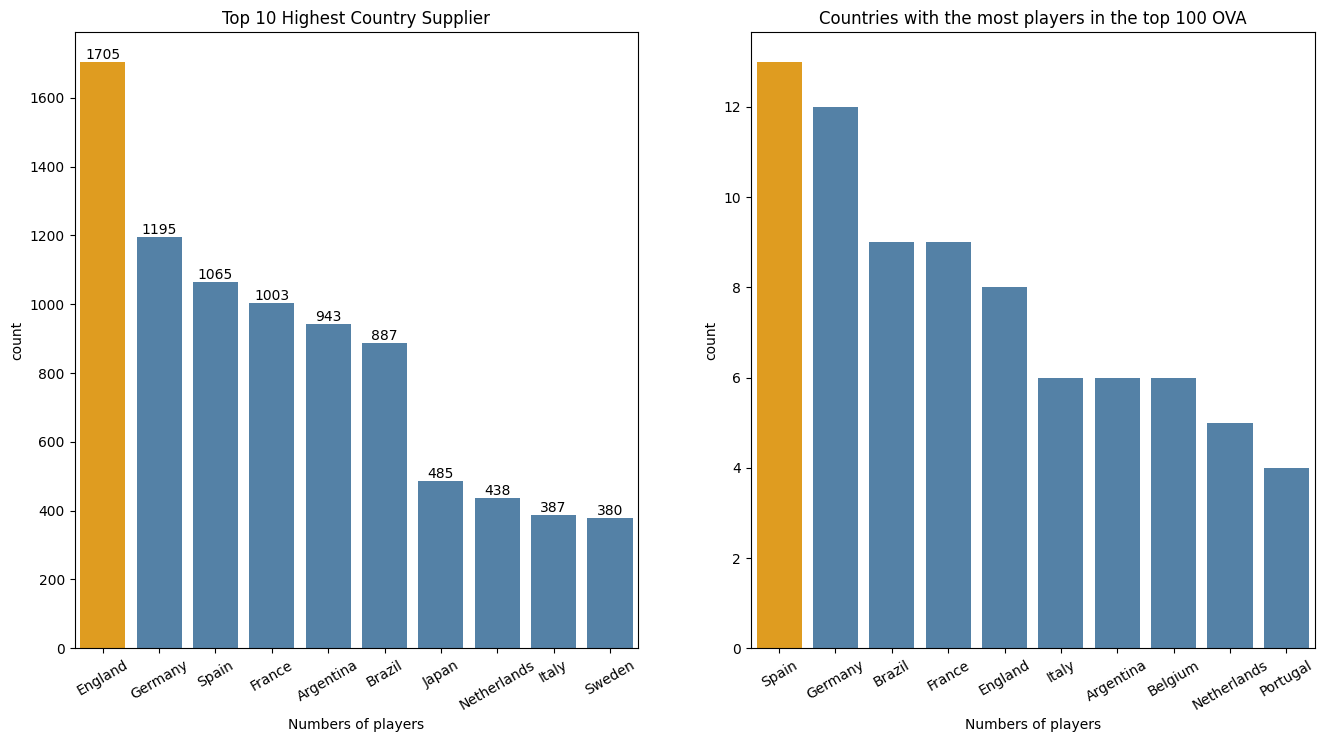

In [172]:
df = fifa5_df.copy()
data_country = df.groupby(by='Nationality').size().reset_index(name='count').sort_values(by='count',ascending=False)
data_country = data_country[:10]

colors = ['orange' if x < 1 else 'steelblue' for x in range(10)]


fig, axs = plt.subplots(ncols=2,figsize=(16,8))

ax = sns.barplot(data_country, x='Nationality',y='count',
                 palette=colors,ax=axs[0])
ax.set_xlabel('Numbers of players')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=30)
axs[0].set_title('Top 10 Highest Country Supplier')
#ax.margins(x=0.1)

country_ova = df.sort_values(by='OVA',ascending=False)
country_ova = country_ova[:100]

asd = country_ova.groupby(by='Nationality').size().reset_index(name="count")
asd = asd.sort_values(by='count',ascending=False)
asd = asd[:10]

ax = sns.barplot(asd, x=asd["Nationality"], y=asd["count"],
                 palette=colors,ax=axs[1])
ax.set_xlabel('Numbers of players')
ax.tick_params(axis='x', rotation=30)
axs[1].set_title('Countries with the most players in the top 100 OVA')

England is the nationality with the highest players with 1705 players and Germany placed second place with 1195 players. But, Spain is nationality with the highest player's overall with 13 players and Germany still placed on second place with 12 players.

#### Preferred Foot Distribution

In [173]:
foot_counts = df["Preferred Foot"].value_counts()
foot_counts

Right    14445
Left      4534
Name: Preferred Foot, dtype: int64

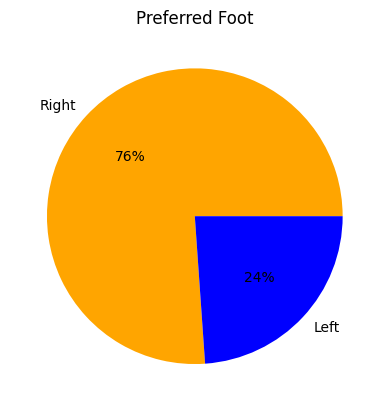

In [174]:
values, labels = foot_counts.values, foot_counts.index

plt.pie(values, labels=labels, autopct='%.0f%%', colors=['orange','blue'])
plt.title('Preferred Foot')
plt.show()

76% of the 18.979 players prefer the Right foot while the rest prefer the Left foot.

#### Status of Contract Distribution

In [175]:
contract_counts = df["Status of Contract"].value_counts()
contract_counts

Contract    17729
Loan         1013
Free          237
Name: Status of Contract, dtype: int64

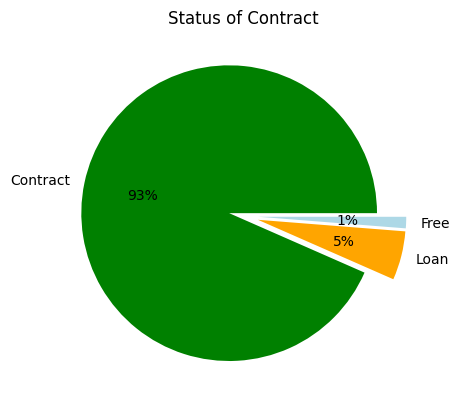

In [176]:
values, labels = contract_counts.values, contract_counts.index

plt.pie(values, labels=labels, autopct='%.0f%%', colors=['green','orange','lightblue'], explode=(0.1, 0.1, 0.1))
plt.title('Status of Contract')
plt.show()

The contract status that players have is divided into 3 type. 93% of the 18.979 players has status "Contract", 5% players has status "Loan", and 1% players has status "Free"

#### Best Position Distribution

In [177]:
print(df['Best Position'].unique())
print('There is',len(list(df['Best Position'].unique())),'positions in Best Position')

['RW' 'ST' 'GK' 'CAM' 'LW' 'CB' 'CDM' 'CF' 'CM' 'RB' 'LB' 'LM' 'RM' 'LWB'
 'RWB']
There is 15 positions in Best Position


There are 4 main areas in Soccer: Goalkeeper, Defence, Midfield, and Attack. We will regrouping best positions based on 4 main areas

In [178]:
position = ['GK','LB','LWB','CB','CDM','RWB','RB','LM','CM','CAM','RM','LW','CF','ST','RW']

#Coloring positions based on area
position_colors = {'GK':'orange',
                   'LB':'blue','LWB':'blue','CB':'blue','CDM':'blue','RWB':'blue','RB':'blue',
                   'LM':'green','CM':'green','CAM':'green','RM':'green',
                   'LW':'red','CF':'red','ST':'red','RW':'red'}
#Grouping positions based on area
DEF = ['LB','LWB','CB','CDM','RWB','RB']
MID = ['LM','CM','CAM','RM']
ATK = ['LW','CF','ST','RW']

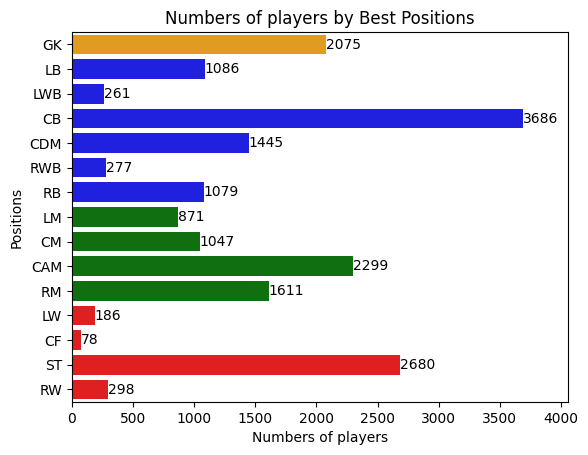

In [179]:
BP_counts = df["Best Position"].value_counts()
values = BP_counts.values
labels = BP_counts.index
sns.set_palette([position_colors[pos] for pos in position])

ax = sns.barplot(data=df,y=labels,x=values,order=position)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Numbers of players')
ax.set_ylabel('Positions')
ax.margins(x=0.1)
plt.title('Numbers of players by Best Positions')

plt.show()

CB or Central Back is the position with the highest number of players with 3686 players and CF or Center Forward is the position with the lowest number of players with 78 players.

#### Player with highest Wage, Release Clause, and Value

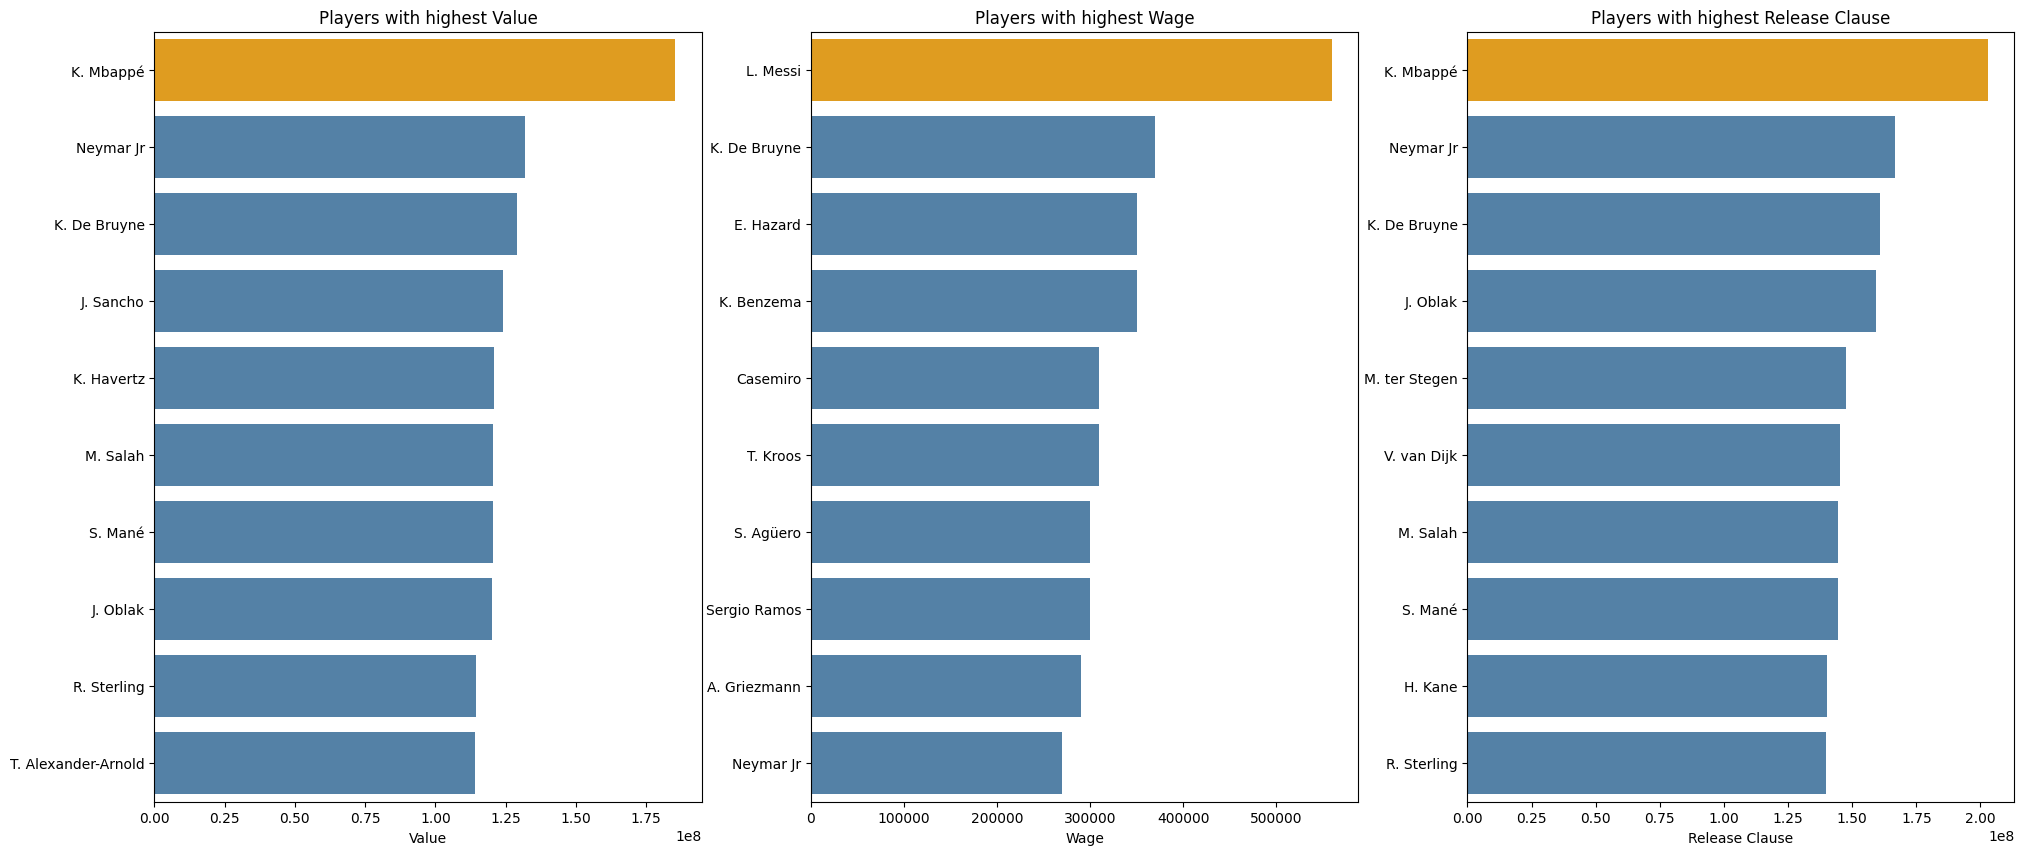

In [180]:
colors = ['orange' if x < 1 else 'steelblue' for x in range(10)]
fig, axs = plt.subplots(ncols=3,figsize=(24,10))

data_value = df.sort_values(by='Value',ascending=False)
data_value = data_value[:10]
axs[0].set_title('Players with highest Value')
ax = sns.barplot(data_value, y='Name',x='Value', palette=colors,ax=axs[0])
ax.set_ylabel('')

data_wage = df.sort_values(by='Wage',ascending=False)
data_wage = data_wage[:10]
axs[1].set_title('Players with highest Wage')
ax = sns.barplot(data_wage, y='Name',x='Wage',palette=colors,ax=axs[1])
ax.set_ylabel('')

data_release = df.sort_values(by='Release Clause',ascending=False)
data_release = data_release[:10]
axs[2].set_title('Players with highest Release Clause')
ax = sns.barplot(data_release, y='Name',x='Release Clause',palette=colors,ax=axs[2])
ax.set_ylabel('')

plt.show()

K. Mbappe is player with the highest Value and Release Clause while L. Messi is player with the highest Wage.

#### Age Distribution

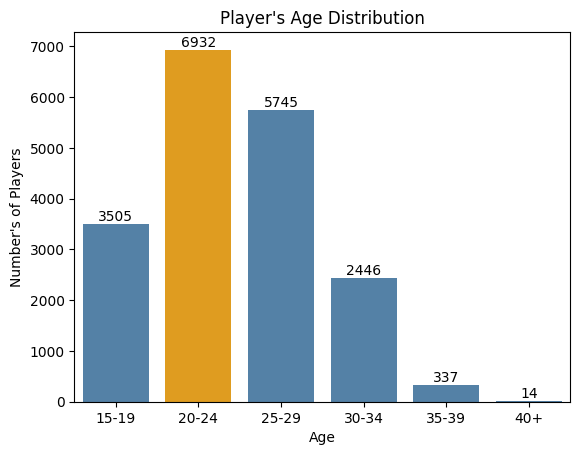

In [181]:
ages = pd.DataFrame(df['Age'],columns=['Age'])
bins = [15, 20, 25, 30, 35, 40,100]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40+']
ages['age'] = pd.cut(ages.Age, bins, labels = labels,include_lowest = True)

ages_df = ages.groupby(by='age').size().reset_index(name='count')
colors = ['orange' if x == 1 else 'steelblue' for x in range(6)]
labels=ages_df['age']
value=ages_df['count']

ax = sns.barplot(x=labels,y=value,palette=colors)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Age')
ax.set_ylabel("Number's of Players")
plt.title("Player's Age Distribution")

plt.show()

The age group with the most players is 20-24 and the least players us 40+.

#### Contract & Joined duration distribution

Text(0.5, 1.0, 'Players joined duration distribution')

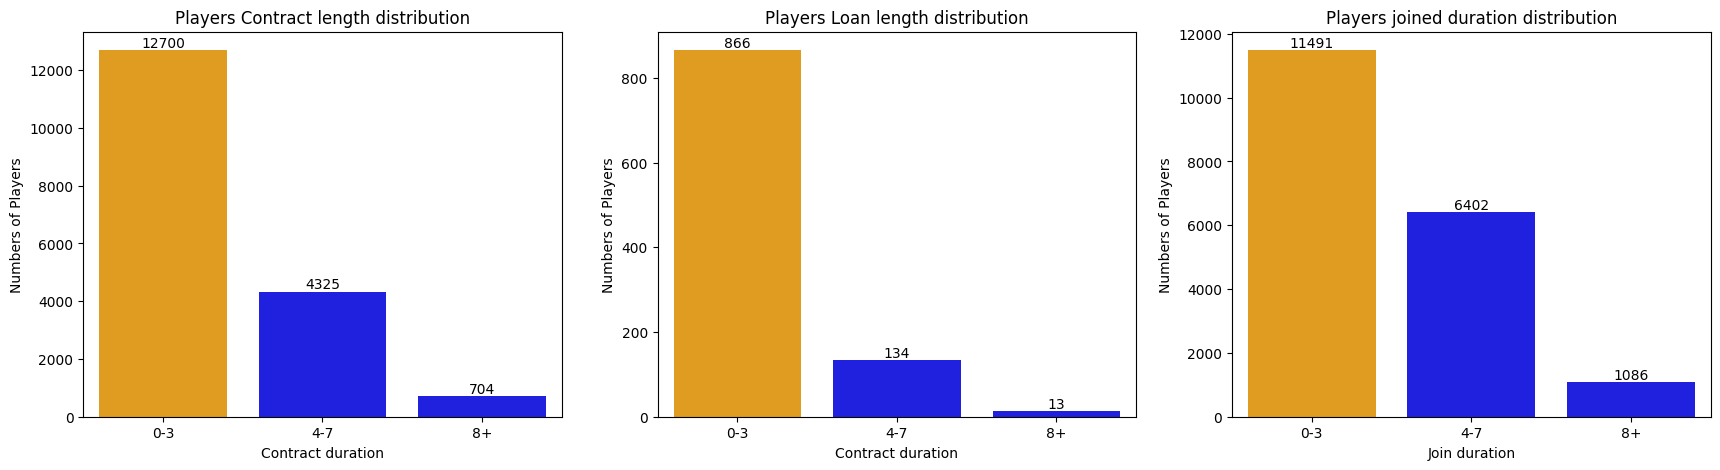

In [182]:
fig, axs = plt.subplots(ncols=3,figsize=(21,5))
bins = [0, 4, 8, 100]
group = ['0-3', '4-7', '8+']

for i,j in [('Contract',0),('Loan',1)]:
  contract=df[df['Status of Contract']==i]['Contract Duration']
  contract_df = pd.DataFrame(contract).astype(int)

  bins = [0, 4, 8, 100]
  labels = ['0-3', '4-7', '8+']

  contract_df['Range Duration'] = pd.cut(contract_df['Contract Duration'], bins, labels = group,include_lowest = True)
  contract_duration_df = contract_df.groupby(by='Range Duration').size().reset_index(name='count')

  labels=contract_duration_df['Range Duration']
  value=contract_duration_df['count']

  ax = sns.barplot(x=labels,y=value,ax=axs[j])
  ax.bar_label(ax.containers[0])
  ax.set_ylabel('Numbers of Players')
  ax.set_xlabel('Contract duration')
  title = 'Players '+i+' length distribution'
  axs[j].set_title(title)

contract=df['Joined Year'].apply(lambda x: 2023-x)
contract_df = pd.DataFrame(contract).astype(int)

contract_df['Joined Year'] = pd.cut(contract_df['Joined Year'], bins, labels = group,include_lowest = True)
contract_duration_df = contract_df.groupby(by='Joined Year').size().reset_index(name='count')
contract_duration_df

labels=contract_duration_df['Joined Year']
value=contract_duration_df['count']

ax = sns.barplot(x=labels,y=value,ax=axs[2])
ax.bar_label(ax.containers[0])
ax.set_ylabel('Numbers of Players')
ax.set_xlabel('Join duration')
title = 'Players join duration distribution'
axs[2].set_title('Players joined duration distribution')

#### W/F, SM, A/W, D/W, dan IR distribution

Distribusi W/F, SM, A/W, D/W, dan IR

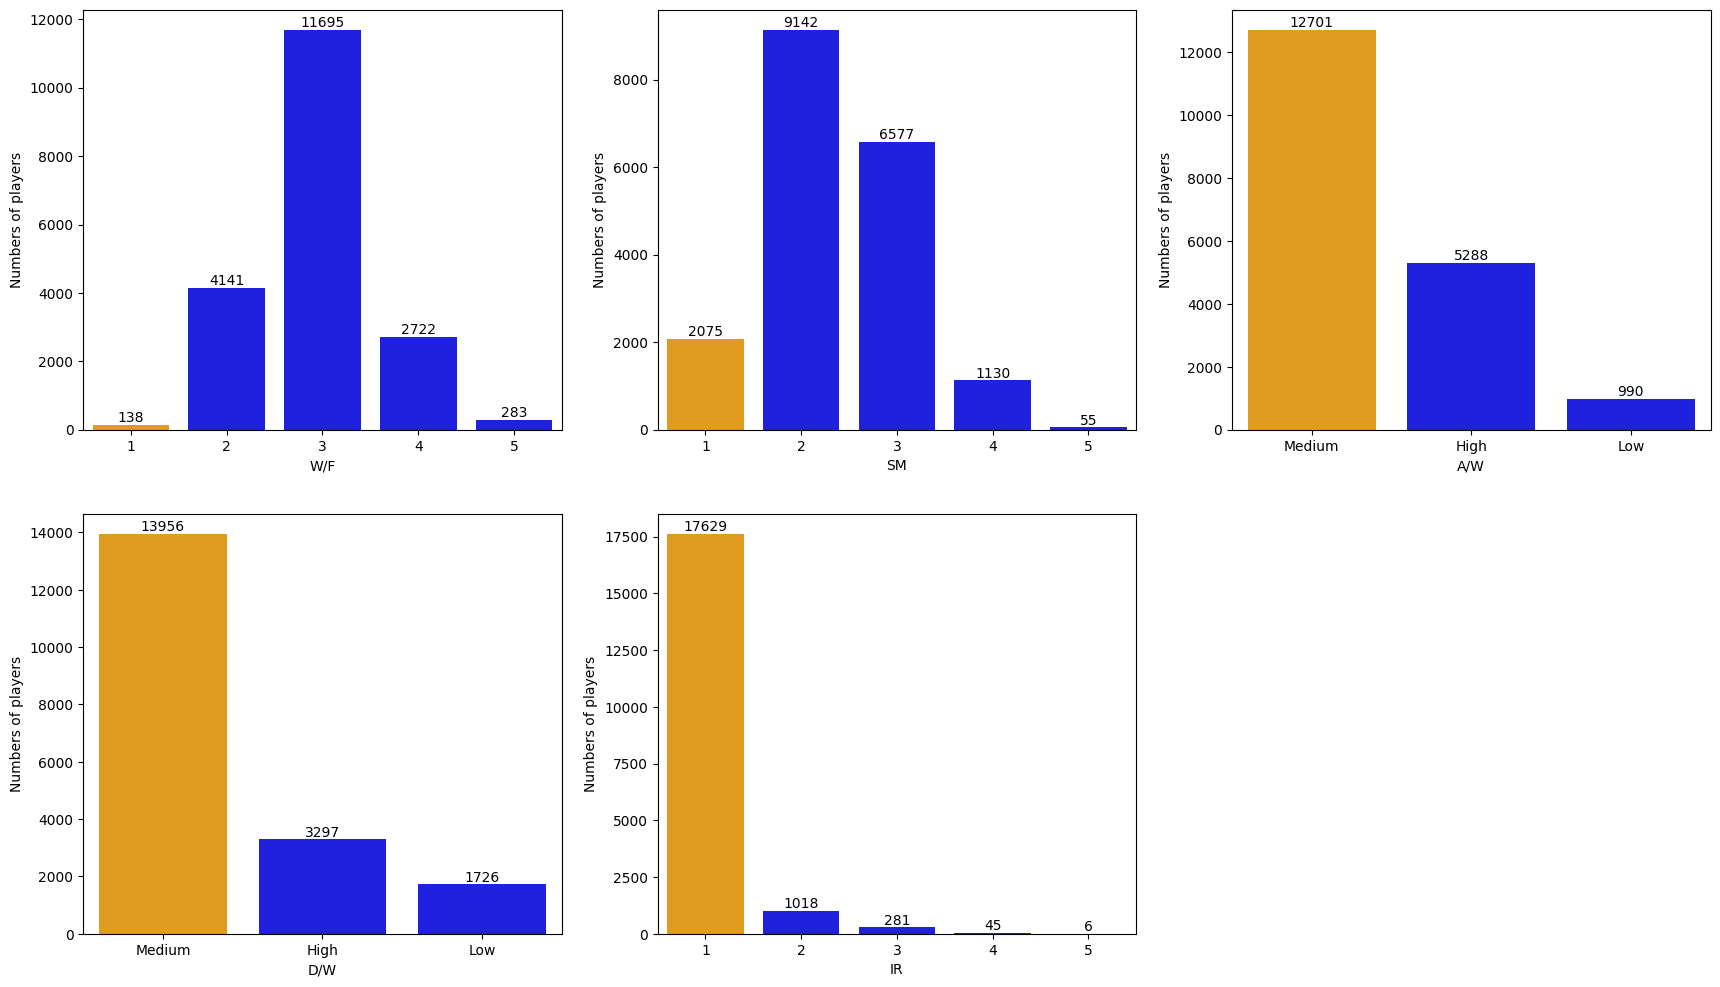

In [183]:
fig, axs = plt.subplots(2,3,figsize=(21,12))
axs[1][2].set_visible(False)
for i,j in [('W/F',0),('SM',1),('A/W',2)]:
  rate_df = df[i].value_counts().reset_index()
  rate_df
  ax = sns.barplot(rate_df, y=i,x='index',ax=axs[0,j])
  ax.set_xlabel(i)
  ax.set_ylabel('Numbers of players')
  ax.bar_label(ax.containers[0])

for i,j in [('D/W',3),('IR',4)]:
  rate_df = df[i].value_counts().reset_index()
  rate_df
  ax = sns.barplot(rate_df, y=i,x='index',ax=axs[1,j-3])
  ax.set_xlabel(i)
  ax.set_ylabel('Numbers of players')
  ax.bar_label(ax.containers[0])

#### Value, Wage, OVA Relation

<Axes: xlabel='OVA', ylabel='Wage'>

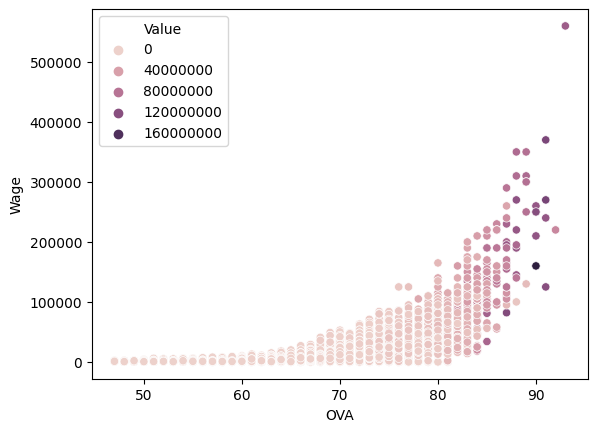

In [184]:
sns.scatterplot(data=df, x='OVA', y='Wage', hue='Value')

For the low to intermediate Overall (<80), there seems to be little relationship to Wage and Value. However, for the high Overalls (>80), the higher the Overall rating make a strong and positive impact to Value and Wage.

<Axes: xlabel='IR', ylabel='Wage'>

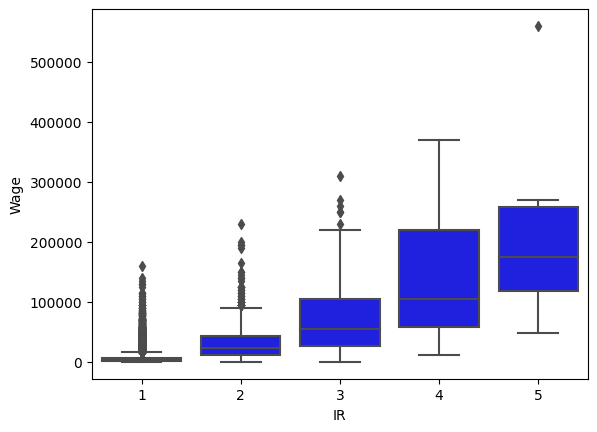

In [185]:
sns.boxplot(data=df, x='IR', y='Wage')

The higher the Reputation (IR), the higher the Wage median for players. While low Reputation players Wage can be varied (the presence of those outliers).

#### OVA Distribution

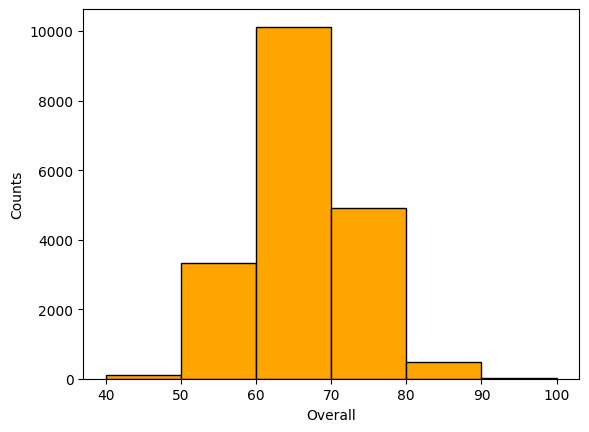

In [186]:
plt.hist(df["OVA"], bins=range(40, 100+10 , 10), edgecolor='k')
plt.ylabel("Counts")
plt.xlabel("Overall")
plt.show()

Most of players' Overall range between 60-70

##### OVA Distribution Based on Best Position

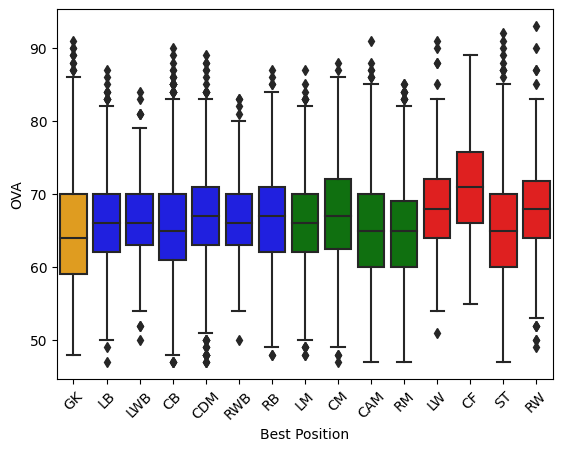

In [187]:
plt.xticks(rotation=45)
sns.boxplot(data=df,x="Best Position",y="OVA",order=position)
plt.show()

There are no significant difference in players' Overall based on Best Positions.

#### Data Correlation

In [188]:
df.columns

Index(['ID', 'Name', 'LongName', 'Nationality', 'Age', 'OVA', 'POT', 'Club',
       'Positions', 'Height', 'Weight', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Joined Year', 'Status of Contract',
       'Contract Start Year', 'Contract End Year', 'Contract Duration',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', '

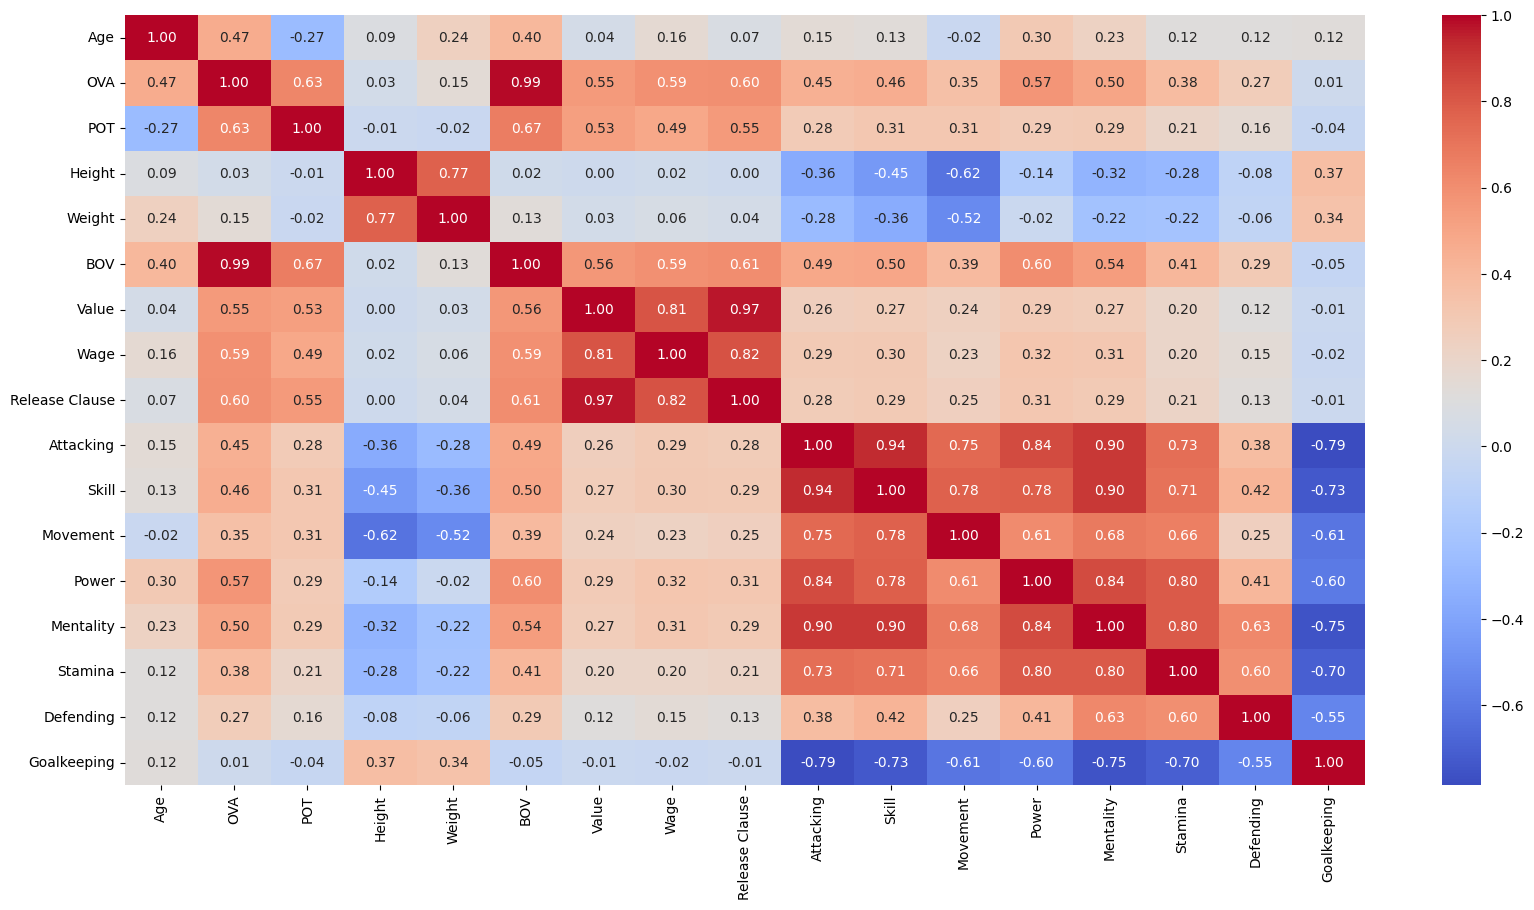

In [189]:
corr_df = df[['Age','OVA','POT','Height','Weight','BOV','Value','Wage','Release Clause','Attacking','Skill','Movement','Power','Mentality','Stamina','Defending','Goalkeeping']]

corr_matrix = corr_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

<Axes: xlabel='OVA'>

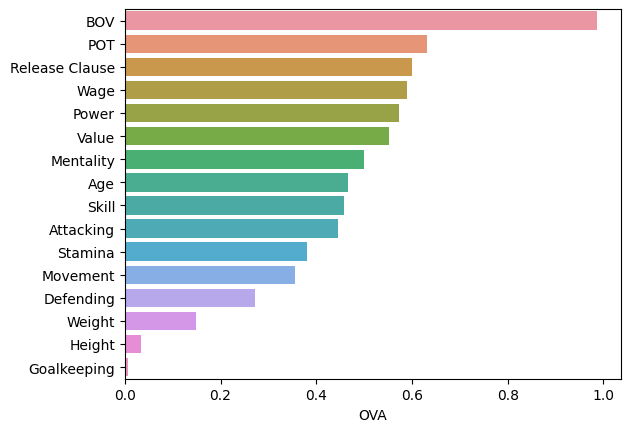

In [190]:
data_corr=corr_df.corr(numeric_only=True)['OVA'].drop('OVA').sort_values(ascending=False)
sns.barplot(x=data_corr,y=data_corr.index)

<Axes: xlabel='Value'>

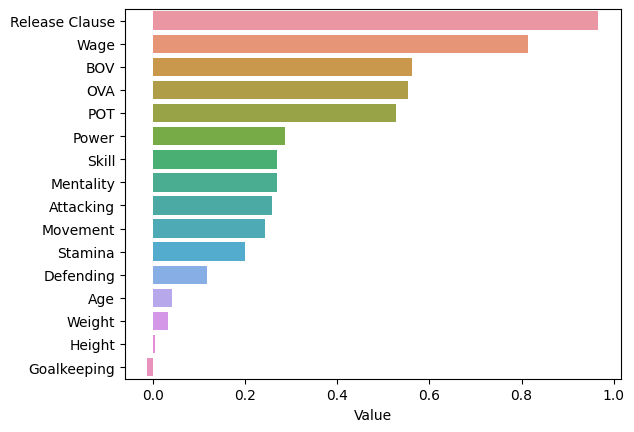

In [191]:
data_corr=corr_df.corr(numeric_only=True)['Value'].drop('Value').sort_values(ascending=False)
sns.barplot(x=data_corr,y=data_corr.index)

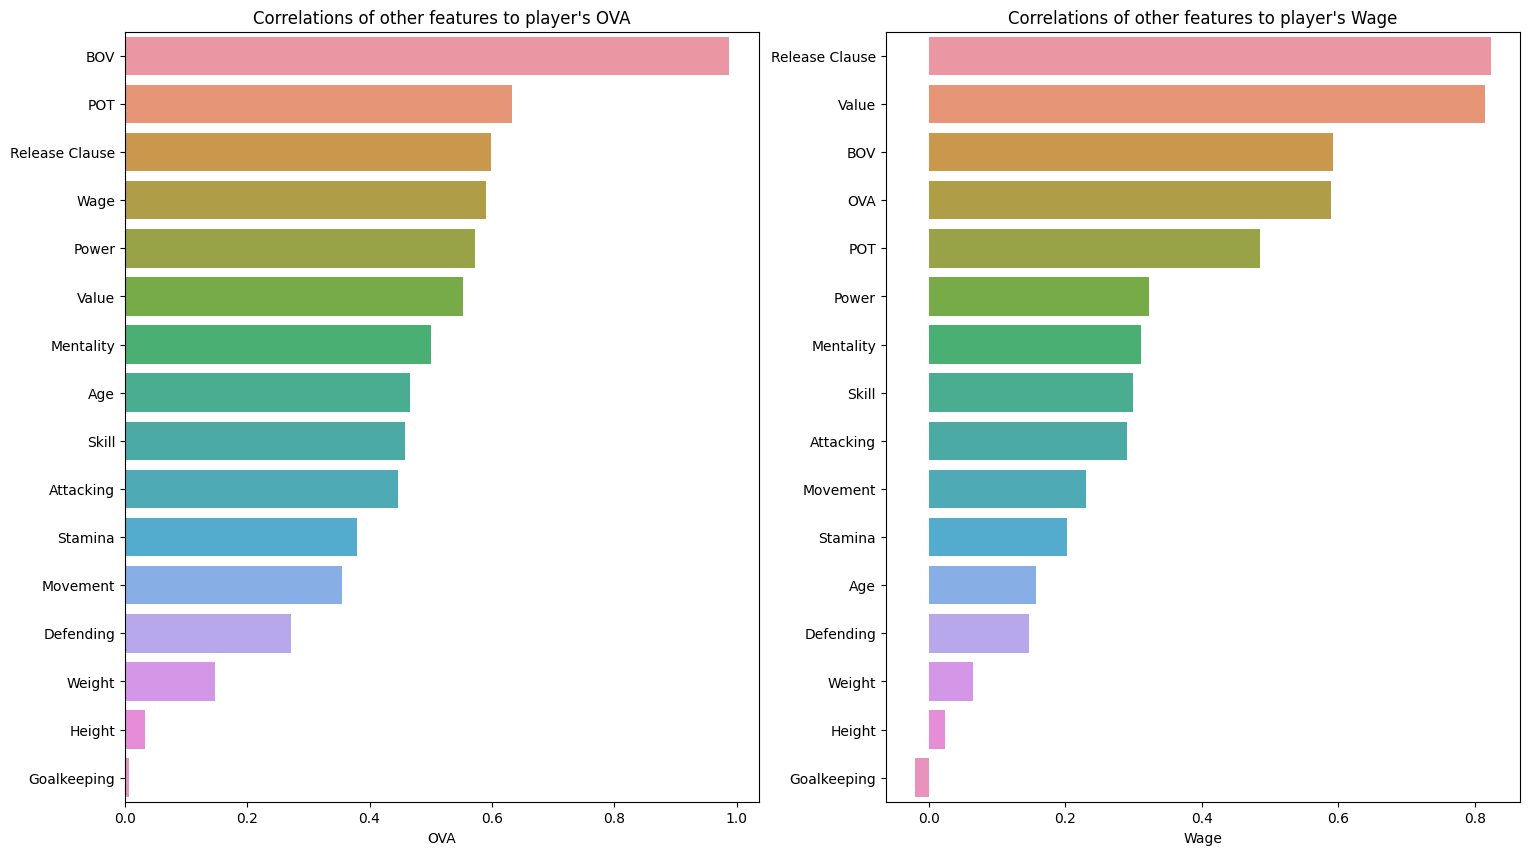

In [192]:
fig, axs = plt.subplots(ncols=2,figsize=(18,10))

data_corr=corr_df.corr(numeric_only=True)['OVA'].drop('OVA').sort_values(ascending=False)
axs[0].set_title("Correlations of other features to player's OVA")
ax = ax = sns.barplot(x=data_corr,y=data_corr.index,ax=axs[0])

data_corr=corr_df.corr(numeric_only=True)['Wage'].drop('Wage').sort_values(ascending=False)
axs[1].set_title("Correlations of other features to player's Wage")
ax = sns.barplot(x=data_corr,y=data_corr.index,ax=axs[1])


plt.show()